In [1]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 2.29G/2.29G [28:30<00:00, 1.44MB/s]

Extracting files...


Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [3]:
train_dir = os.path.join(path, "chest_xray/train")
val_dir   = os.path.join(path, "chest_xray/val")
test_dir  = os.path.join(path, "chest_xray/test")

In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.4)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_4              │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d_4[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_5              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_5[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,038,529 (26.85 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [8]:
history = model.fit(train_generator,validation_data=val_generator,epochs=10)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1188s 7s/step - accuracy: 0.5314 - loss: 0.8955 - val_accuracy: 0.5000 - val_loss: 0.6811
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 719s 4s/step - accuracy: 0.7061 - loss: 0.5931 - val_accuracy: 0.5000 - val_loss: 0.6430
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 732s 4s/step - accuracy: 0.7498 - loss: 0.5226 - val_accuracy: 0.6875 - val_loss: 0.5940
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 863s 5s/step - accuracy: 0.7728 - loss: 0.4740 - val_accuracy: 0.7500 - val_loss: 0.5617
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 801s 5s/step - accuracy: 0.8000 - loss: 0.4302 - val_accuracy: 0.7500 - val_loss: 0.5323
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 767s 5s/step - accuracy: 0.8204 - loss: 0.3939 - val_accuracy: 0.7500 - val_loss: 0.5177
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 798s 5s/step - accuracy: 0.8357 - loss: 0.3633 - val_accuracy: 0.8125 - val_loss: 0.4897
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 741s 5s/step - accuracy: 0.8493 - loss: 0.3432 - val_acc

In [9]:
base_model.trainable = True
for layer in base_model.layers[:300]:  # keep lower layers frozen
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5), loss="binary_crossentropy", metrics=["accuracy"])

history_finetune = model.fit(train_generator,validation_data=val_generator, epochs=20)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1132s 6s/step - accuracy: 0.8710 - loss: 0.2930 - val_accuracy: 0.6875 - val_loss: 0.4790
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 807s 5s/step - accuracy: 0.9237 - loss: 0.1872 - val_accuracy: 0.6875 - val_loss: 0.3622
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 829s 5s/step - accuracy: 0.9431 - loss: 0.1515 - val_accuracy: 0.8750 - val_loss: 0.2570
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 799s 5s/step - accuracy: 0.9519 - loss: 0.1301 - val_accuracy: 1.0000 - val_loss: 0.2121
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 809s 5s/step - accuracy: 0.9584 - loss: 0.1124 - val_accuracy: 0.9375 - val_loss: 0.2068
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 806s 5s/step - accuracy: 0.9626 - loss: 0.1074 - val_accuracy: 1.0000 - val_loss: 0.1590
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 855s 5s/step - accuracy: 0.9574 - loss: 0.1088 - val_accuracy: 1.0000 - val_loss: 0.1279
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 802s 5s/step - accuracy: 0.9645 - loss: 0.0929 - val_acc

In [10]:
loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.9135 - loss: 0.2866 
✅ Test Accuracy: 91.35%


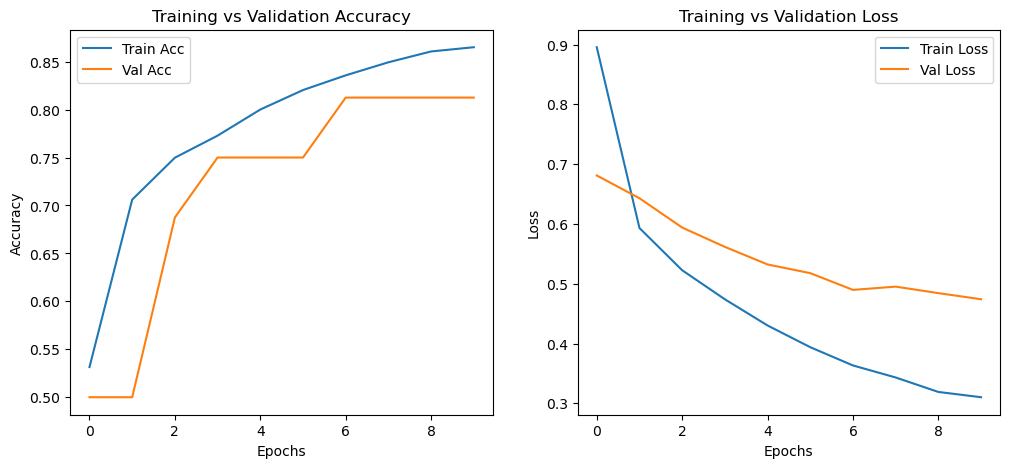

1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step


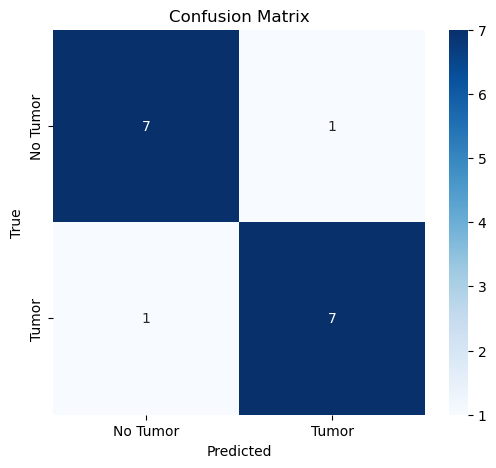

Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.88      0.88      0.88         8
       Tumor       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()


# Predict on validation set
y_pred = model.predict(val_generator)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()

y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=["No Tumor", "Tumor"]))